# Example of Data Visualization and Analysis in Jupyter Notebook with Julia

**Abstract**

 The Julia programming language can be used to produced high quality plots with ease. In the example here we define, plot and fit a Voltage v. Current series with just 5 lines of code. For a genera introduction to Jupyter notebooks the accompanying "Jupyter Notebooks" notebook.


**Initialization**

We start by initializing standard `Plots` libraries (in Julia parlance ***packages***)

In [2]:
using Plots; using StatsPlots

**Data Entry**

In this example we want to measured currents as function of the input voltage in the circuit. For example, we measure between 0.5 and 5 V in 0.5 V increments. we create an `iv` array to contain the values. Please note formatting, each column is separated by a space, each roaw by a semicolon. Inserting values by hand would look like this:

In [3]:
#Voltage entries
iv = [
     0.5 0.045;
     1.0 1.1;
     1.5 1.65;
     2.0 1.9;
     2.5 2.58;
    ]

5×2 Matrix{Float64}:
 0.5  0.045
 1.0  1.1
 1.5  1.65
 2.0  1.9
 2.5  2.58

**Plotting Data**

Julia makes it very easy to plot numerical evaluations using the `plot` function. This would result in a single line graph. However, for experimental data we want to represent each measurement with a point using the `scatter` function.

Julia array convention is first index -> row number, second index -> column number. We use `:` to define all values, therefore `iv[:,1]` corresponds to first column all rows, currents.

Plot properties can be directly inserted in the `scatter` command, so have fun with markers shapes, colors and sizes!

Plotting the voltage as a function of the current then looks like this


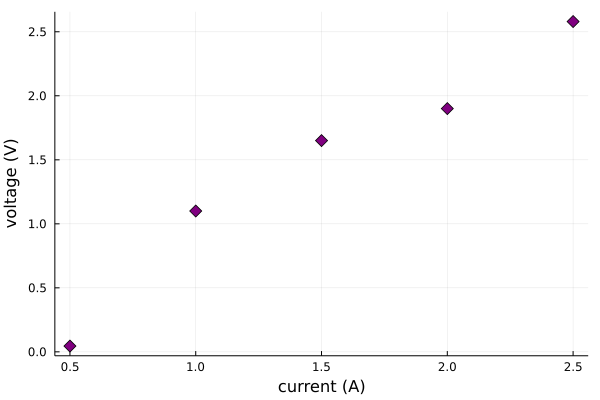

In [6]:
scatter(iv[:,1],iv[:,2],label=false,xlabel="current (A)",ylabel="voltage (V)", markersize=6,markershape=:diamond,markercolor=:purple )

**Determining the circuit resistor**

Now that we have both the data set and we can graph it all is left is to determine the circuit resistor value $R$. From Ohm's law:

$V=I•R$

therefore a simple linear regresion of the data series above will return the value of the resistor. Linear regresions are directly supported by the `Polynomials` package.

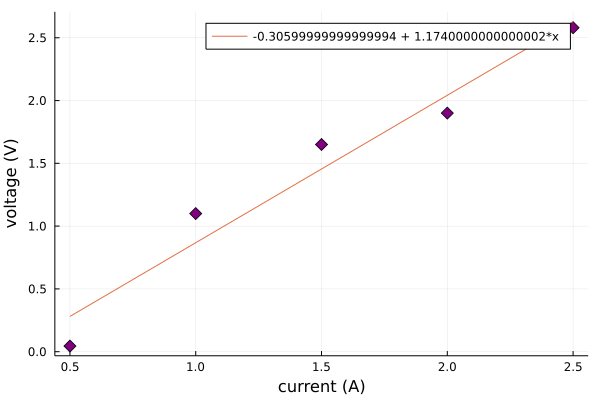

In [8]:
using Polynomials
fV=fit(iv[:,1],iv[:,2],1)
plot!(fV, extrema(iv[:,1])...)